## **Project 4. Student Performance**
> **(Team 9) Rachel Schoen, Andrea Wu, Mahind Rao, Mahalel Peter**

### I. **Introduction**
* *   * * 

For this project, we sought to explore a means to analyze and predict student performance based off a multitude of different variables, including but not limited to: attendance, taking notes, reading frequency, transporation, scholarships, and even parental status.

In other words:

> **What are the key factors that influence the success of a student?**


- How do students with additional work responsibilities fare academically compared to those without?
- How does the type of accommodation affect students' study habits and performance?
- How does discussion and group work influence students' interest and success in their courses?
- Can we predict a student’s academic performance (e.g., grade point average or success in courses) based on their personal background, study habits, and extracurricular activities?

* *   * * 
We decided to approach the topic in the following outline:

#### A. **Exploratory Data Analysis**
  - Create basic visualizations to observe any trends or patterns using Matplotlib or Tableau.
  - Create some sort of interactivity with the graphs, using HTML or otherwise.

#### B. **SQL Database**
  - Populate a SQL database using the CSV file, then connect to the database in order to continue analysis and predictions.

#### C. **Data Modeling**
  - Create a relational data model, or a graph data model.
  - Use supervised learning.
  - Create a Logistic Regression model.

#### D. **Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

  

### II. **Exploratory Data Analysis**
* *   * * 

To start with, we decided to manually clean the data via Excel, removing any columns that we deemed unnecessary or difficult to draw strong conclusions from. 

From there, we performed an exploratory data analysis— some basic observations by reading the CSV file directly in order to visualize the story a little more.

In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")


In [2]:
# import pandas as pd
# performance = pd.read_csv('Resources\StudentsPerformance_with_headers.csv', encoding='ISO-8859-1', low_memory=False)
# performance.head()


In [3]:
# Define the file path
path = Path('Resources/StudentsPerformance_with_headers.csv')

# Read the CSV file into DataFrame
master_df = pd.read_csv(path)

master_df


StudentID  StudentAge  Sex  GraduatedHighSchoolType  ScholarshipType  \
0      STUDENT1           2    2                        3                3   
1      STUDENT2           2    2                        3                3   
2      STUDENT3           2    2                        2                3   
3      STUDENT4           1    1                        1                3   
4      STUDENT5           2    2                        1                3   
..          ...         ...  ...                      ...              ...   
140  STUDENT141           2    1                        2                3   
141  STUDENT142           1    1                        2                4   
142  STUDENT143           1    1                        1                4   
143  STUDENT144           2    1                        2                4   
144  STUDENT145           1    1                        1                5   

     AdditionalWork  ArtisticOrSportsActivity  HasPartner  TotalSalary  \
0                 1                         2           2            1   
1                 1                         2           2            1   
2                 2                         2           2            2   
3                 1                         2           1            2   
4                 2                         2           1            3   
..              ...                       ...         ...          ...   
140               1                         1           2            1   
141               2                         2           2            1   
142               2                         2           2            1   
143               1                         1           1            5   
144               2                         2           2            3   

     Transportation  ...  ReadingScientific  SeminarAttendance  ProjectImpact  \
0                 1  ...                  2                  1              1   
1                 1  ...                  2                  1              1   
2                 4  ...                  2                  1              1   
3                 1  ...                  2                  1              1   
4                 1  ...                  1                  1              1   
..              ...  ...                ...                ...            ...   
140               1  ...                  2                  1              1   
141               4  ...                  2                  2              1   
142               1  ...                  2                  1              1   
143               2  ...                  1                  1              1   
144               1  ...                  1                  1              1   

     ClassAttendance  MidtermPrepAloneOrGroup  MidtermPrepTimeSpent  \
0                  1                        1                     1   
1                  1                        1                     1   
2                  1                        1                     1   
3                  1                        1                     2   
4                  1                        2                     1   
..               ...                      ...                   ...   
140                1                        1                     1   
141                2                        1                     1   
142                1                        1                     1   
143                1                        2                     1   
144                1                        2                     1   

     NoteTaking  ListeningInClass  DiscussionInterest  Grade  
0             3                 2                   1      1  
1             3                 2                   3      1  
2             2                 2                   1      1  
3             3                 2                   2      1  
4             2                 2      

In [4]:
master_df.dtypes
master_df['Grade'] = pd.to_numeric(master_df['Grade'])
master_df.dtypes


StudentID                   object
StudentAge                   int64
Sex                          int64
GraduatedHighSchoolType      int64
ScholarshipType              int64
AdditionalWork               int64
ArtisticOrSportsActivity     int64
HasPartner                   int64
TotalSalary                  int64
Transportation               int64
MothersEducation             int64
FathersEducation             int64
NumberOfSiblings             int64
ParentalStatus               int64
WeeklyStudyHours             int64
ReadingNonScientific         int64
ReadingScientific            int64
SeminarAttendance            int64
ProjectImpact                int64
ClassAttendance              int64
MidtermPrepAloneOrGroup      int64
MidtermPrepTimeSpent         int64
NoteTaking                   int64
ListeningInClass             int64
DiscussionInterest           int64
Grade                        int64
dtype: object

In [5]:
# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
master_df['Grade_Label'] = master_df['Grade'].map(grade_mapping)
master_df


StudentID  StudentAge  Sex  GraduatedHighSchoolType  ScholarshipType  \
0      STUDENT1           2    2                        3                3   
1      STUDENT2           2    2                        3                3   
2      STUDENT3           2    2                        2                3   
3      STUDENT4           1    1                        1                3   
4      STUDENT5           2    2                        1                3   
..          ...         ...  ...                      ...              ...   
140  STUDENT141           2    1                        2                3   
141  STUDENT142           1    1                        2                4   
142  STUDENT143           1    1                        1                4   
143  STUDENT144           2    1                        2                4   
144  STUDENT145           1    1                        1                5   

     AdditionalWork  ArtisticOrSportsActivity  HasPartner  TotalSalary  \
0                 1                         2           2            1   
1                 1                         2           2            1   
2                 2                         2           2            2   
3                 1                         2           1            2   
4                 2                         2           1            3   
..              ...                       ...         ...          ...   
140               1                         1           2            1   
141               2                         2           2            1   
142               2                         2           2            1   
143               1                         1           1            5   
144               2                         2           2            3   

     Transportation  ...  SeminarAttendance  ProjectImpact  ClassAttendance  \
0                 1  ...                  1              1                1   
1                 1  ...                  1              1                1   
2                 4  ...                  1              1                1   
3                 1  ...                  1              1                1   
4                 1  ...                  1              1                1   
..              ...  ...                ...            ...              ...   
140               1  ...                  1              1                1   
141               4  ...                  2              1                2   
142               1  ...                  1              1                1   
143               2  ...                  1              1                1   
144               1  ...                  1              1                1   

     MidtermPrepAloneOrGroup  MidtermPrepTimeSpent  NoteTaking  \
0                          1                     1           3   
1                          1                     1           3   
2                          1                     1           2   
3                          1                     2           3   
4                          2                     1           2   
..                       ...                   ...         ...   
140                        1                     1           2   
141                        1                     1           3   
142                        1                     1           3   
143                        2                     1           2   
144                        2                     1           3   

     ListeningInClass  DiscussionInterest  Grade  Grade_Label  
0                   2                   1      1           DD  
1                   2                   3      1           DD  
2                   2                   1      1           DD  
3                   2                   2      1           DD  
4                   2                   2      1           DD  
..                ...                 ...    ...      

In [6]:
# Get the frequency count of each grade
grade_summary = master_df['Grade'].value_counts()

# Sort by the index (grades)
sorted_grade_summary = grade_summary.sort_index()

# Convert to DataFrame for display purposes
grade_summary_df = sorted_grade_summary.reset_index()
grade_summary_df.columns = ['Grade', 'Count']

# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
grade_summary_df['Grade_Label'] = grade_summary_df['Grade'].map(grade_mapping)

print(grade_summary_df)


   Grade  Count Grade_Label
0      0      8        Fail
1      1     35          DD
2      2     24          DC
3      3     21          CC
4      4     10          CB
5      5     17          BB
6      6     13          BA
7      7     17          AA


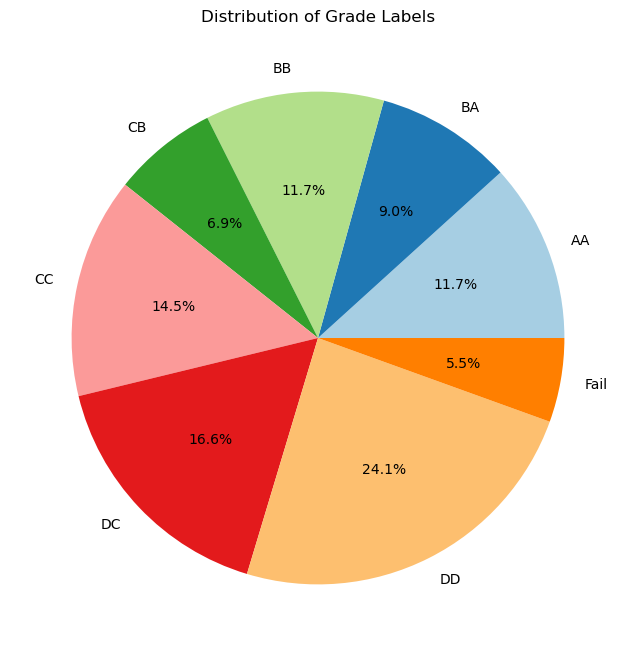

In [7]:
# Get the count of each grade label
grade_counts = master_df['Grade_Label'].value_counts()

# Define the desired order
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']

# Reorder the counts according to the defined order
ordered_grade_counts = grade_counts.reindex(grade_order, fill_value=0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ordered_grade_counts, labels=ordered_grade_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(ordered_grade_counts))))

# Add title
plt.title('Distribution of Grade Labels')

# Show the plot
plt.show()


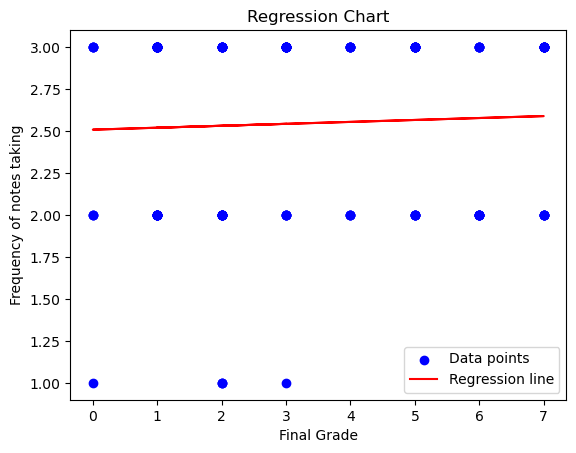

In [8]:
#Run regression on taking notes in class and Final Grades

X = master_df['Grade'].values.reshape(-1, 1)  
y = master_df['NoteTaking'].values 

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# Plot the data points (scatter plot)
plt.scatter(master_df['Grade'], master_df['NoteTaking'], color='blue', label='Data points')

# Plot the regression line
plt.plot(master_df['Grade'], y_pred, color='red', label='Regression line')

# Add title and labels
plt.title('Regression Chart')
plt.xlabel('Final Grade')
plt.ylabel('Frequency of notes taking')
plt.legend()

# Show the plot
plt.show()


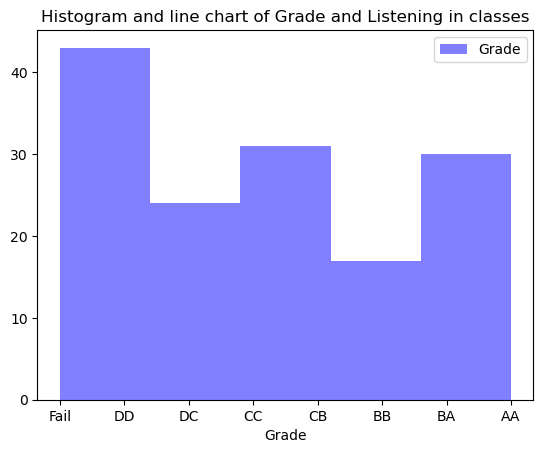

In [9]:
# Create a histogram for both variables
plt.hist(master_df['Grade'], bins=5, color='blue', alpha=0.5, label='Grade')


# Add title and labels
plt.title('Histogram and line chart of Grade and Listening in classes')
plt.xlabel('Grade')

# Update tick labels for x-axis
grade_labels = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
plt.xticks(ticks=range(len(grade_labels)), labels=grade_labels)

# Add legend
plt.legend()

# Show the plot
plt.show()


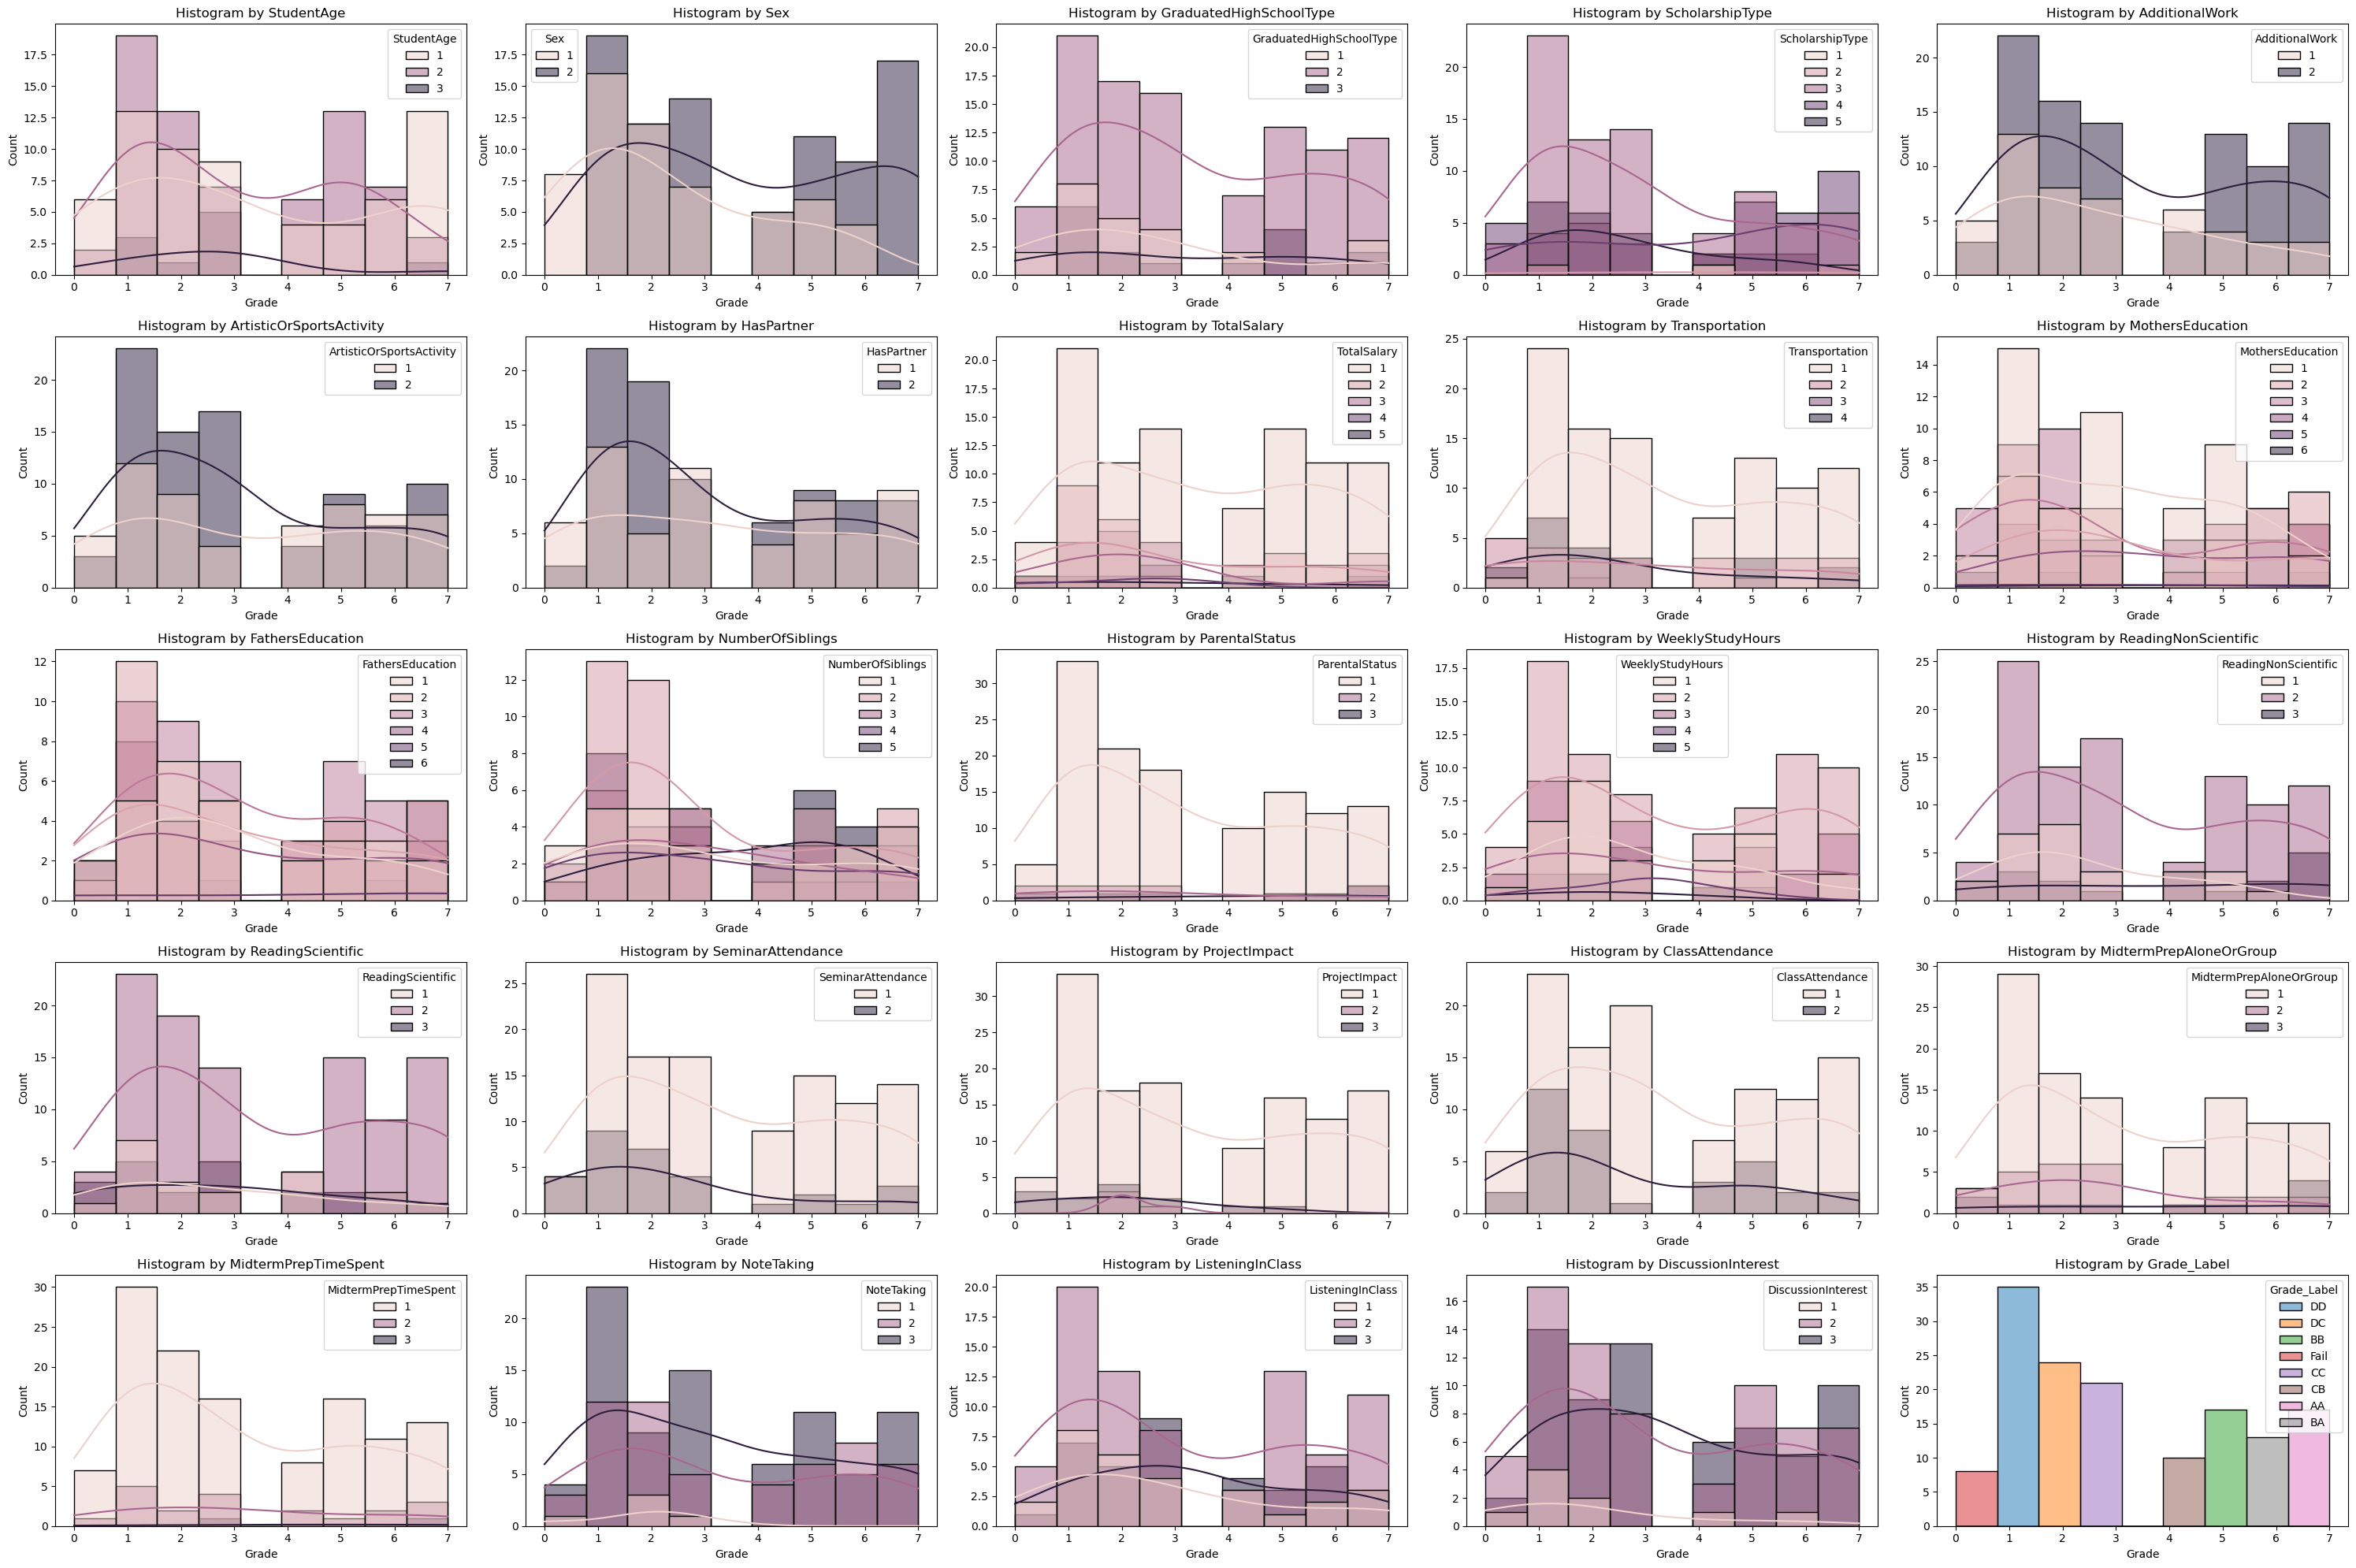

In [10]:
# Define the column to use as the x-axis value
x_column = 'Grade'

# Define the columns to exclude 
exclude_columns = [x_column, 'StudentID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()


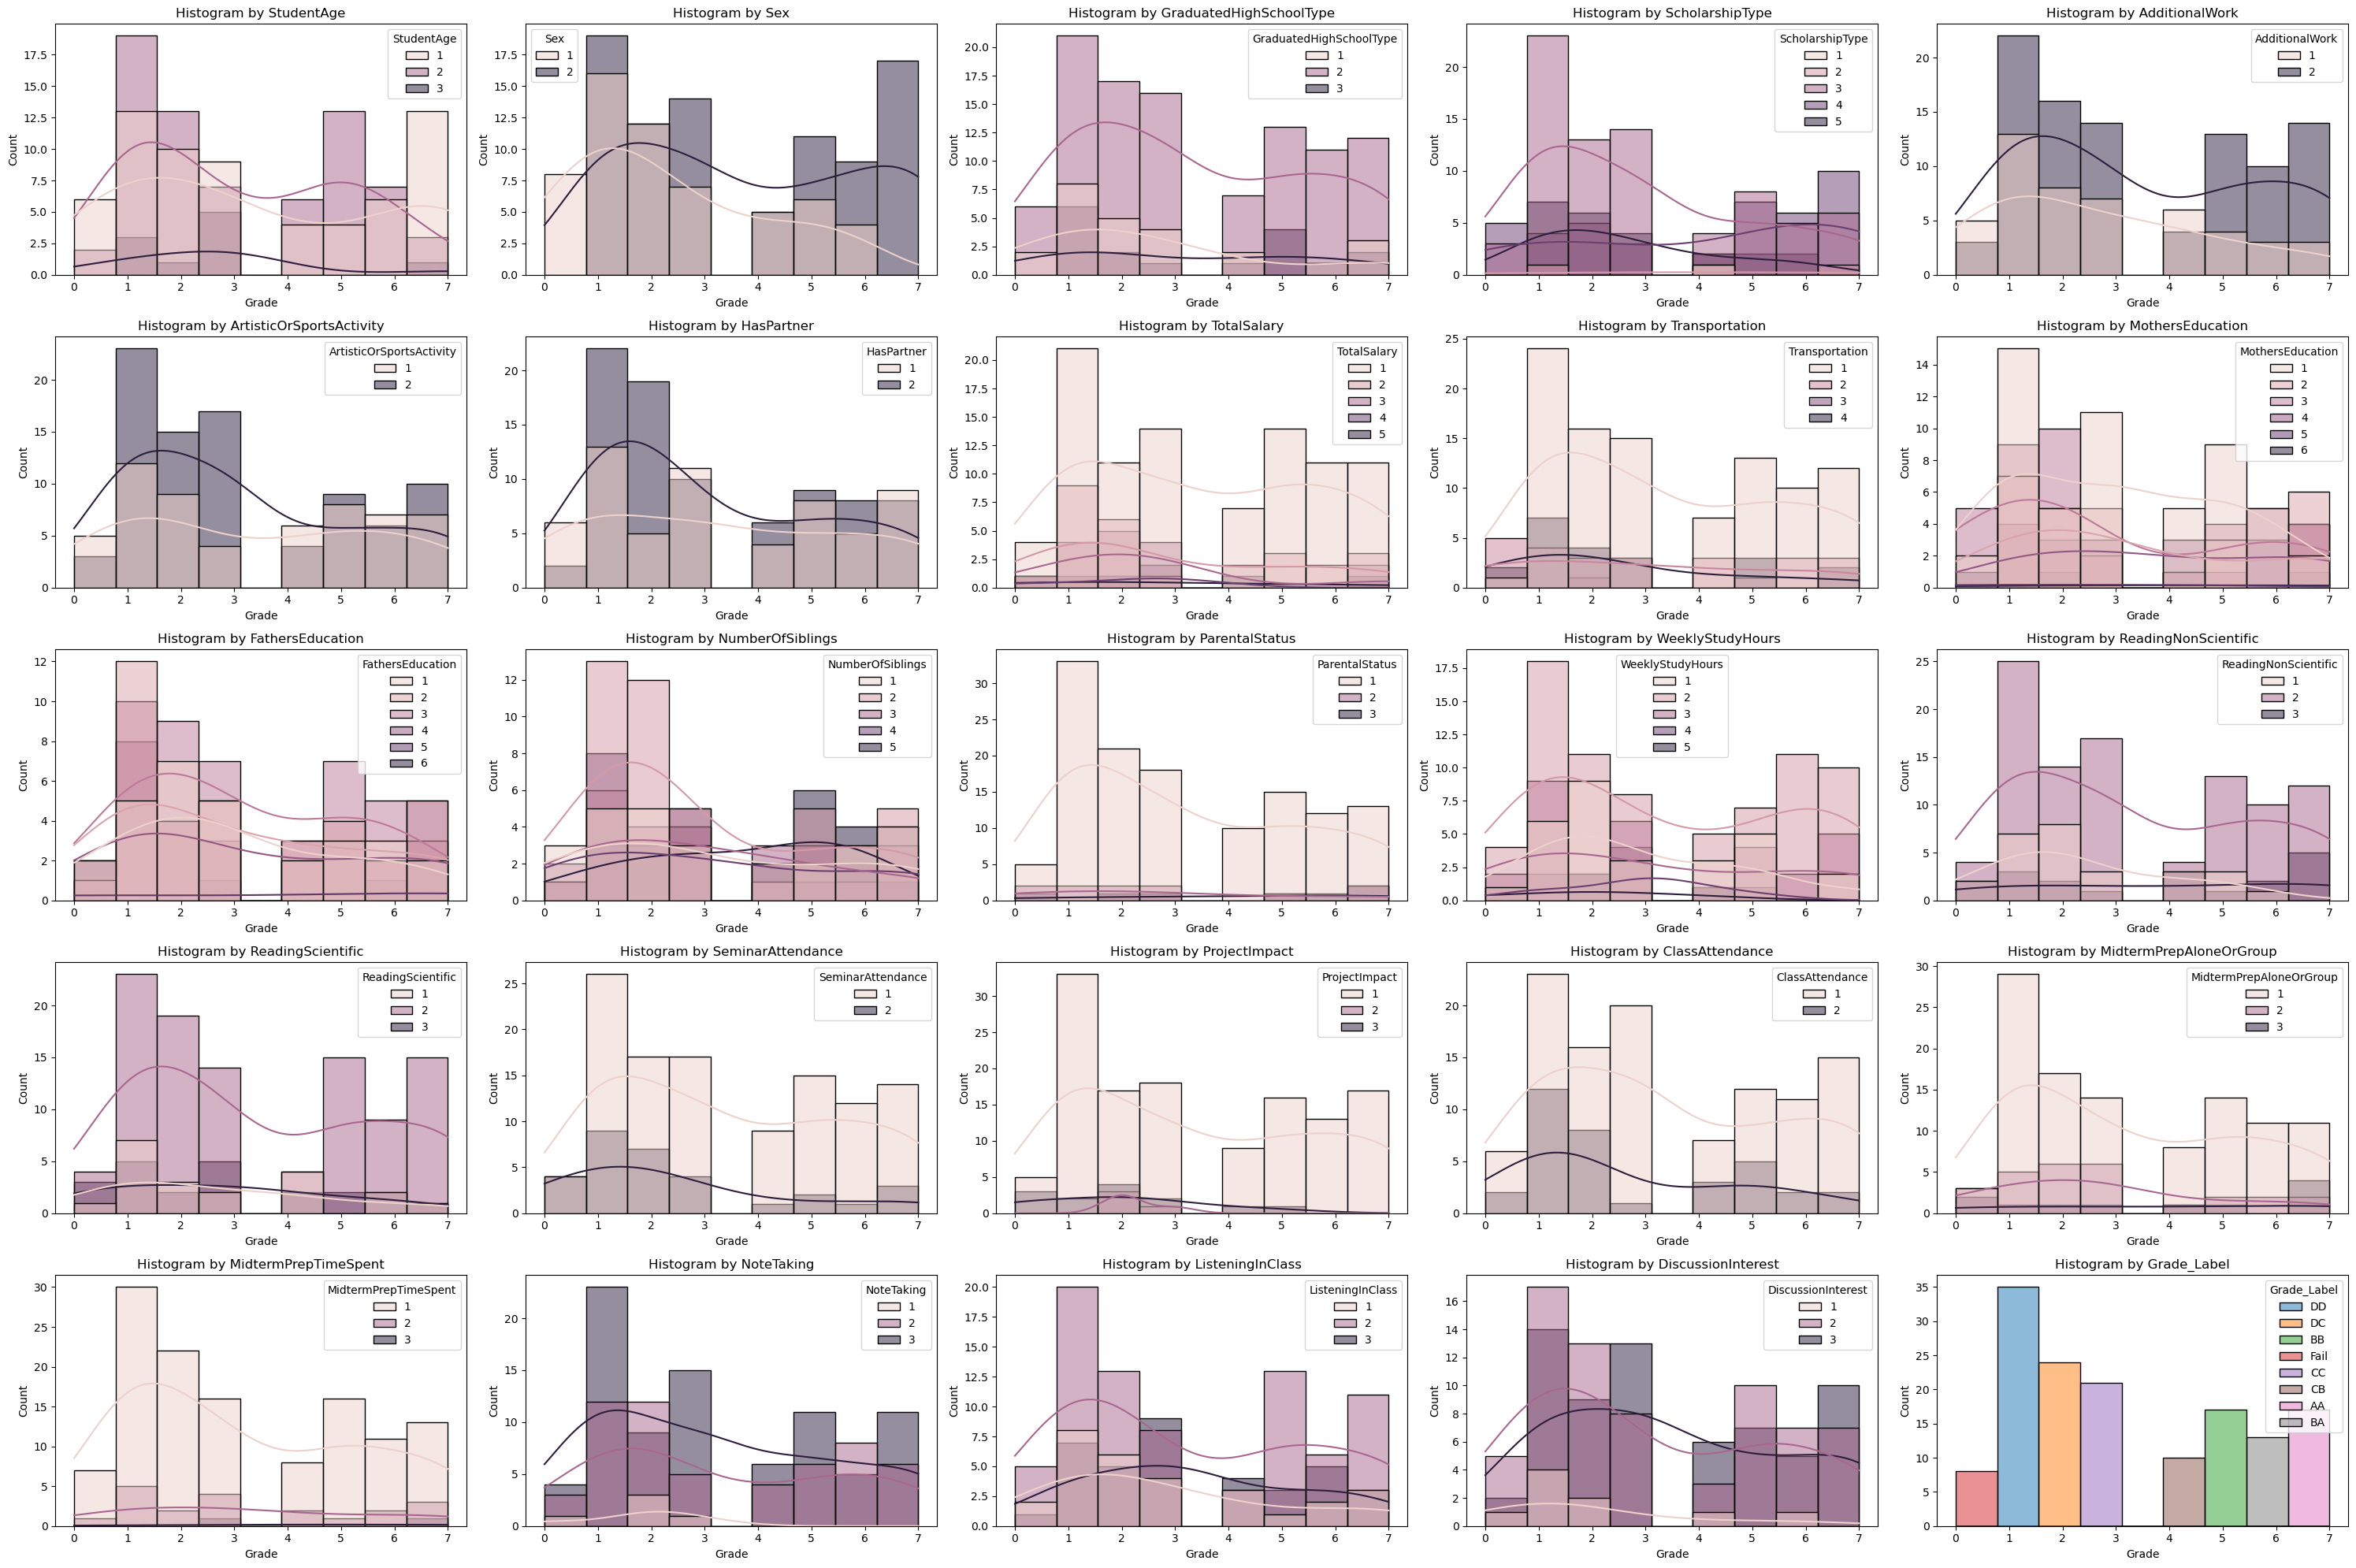

In [11]:
# Define the column to use as the x-axis value
x_column = 'Grade'

# Define the columns to exclude 
exclude_columns = [x_column, 'StudentID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()


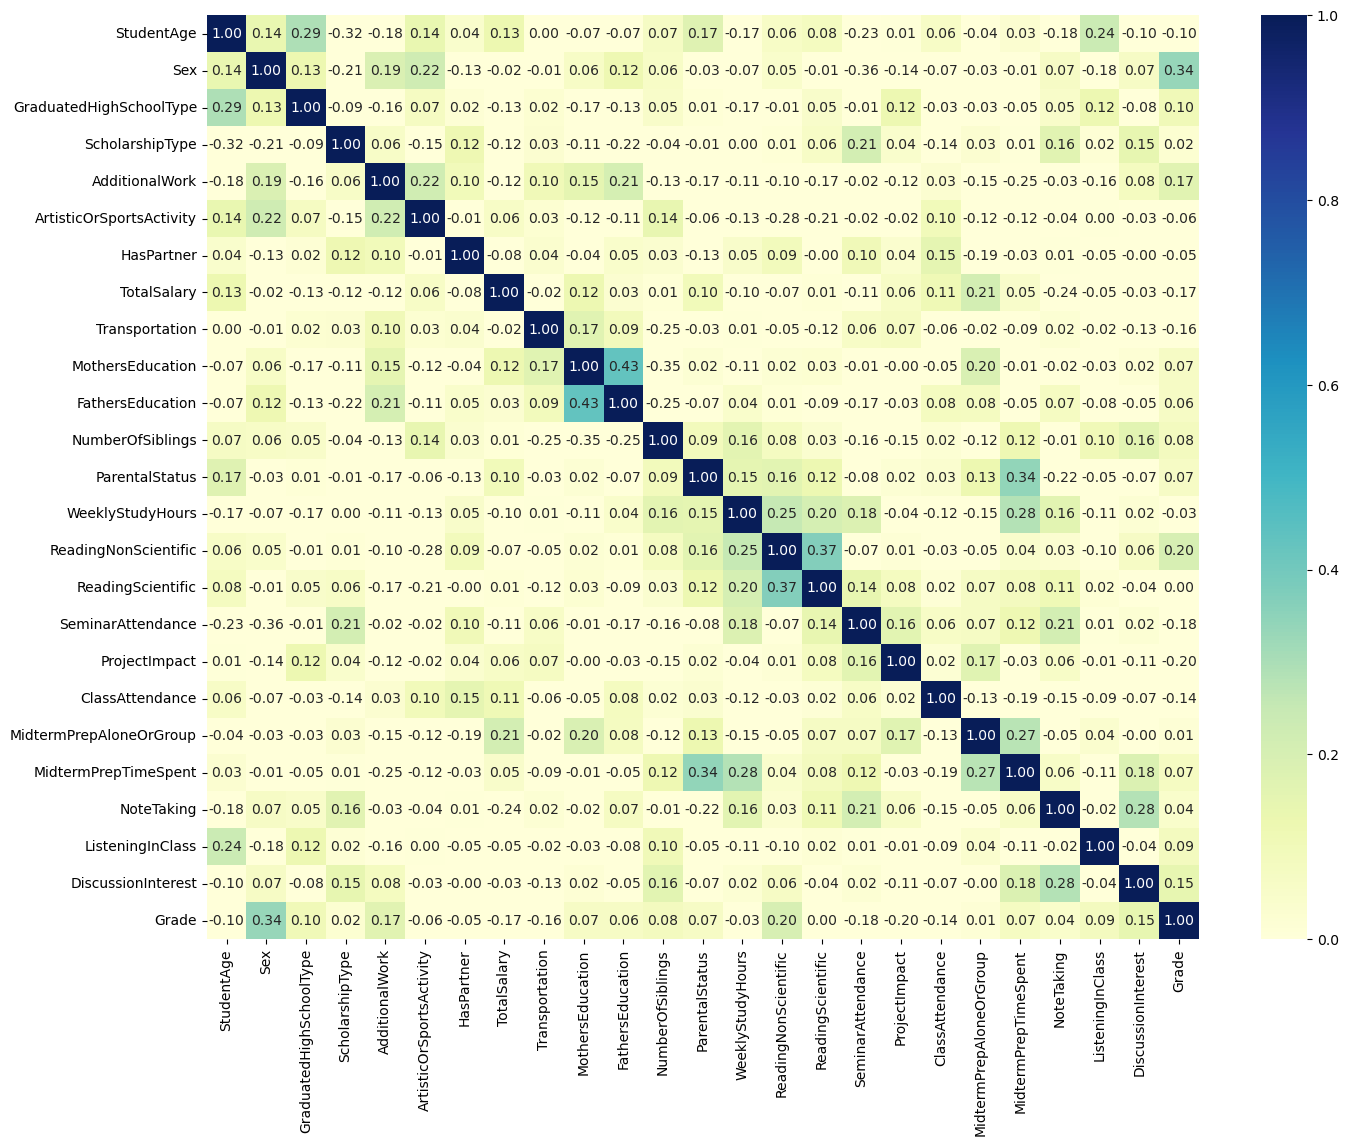

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(master_df.drop(['StudentID','Grade_Label'], axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

plt.show()


##### **Logistic Regression**

  StudentID  StudentAge  Sex  GraduatedHighSchoolType  ScholarshipType  \
0  STUDENT1           2    2                        3                3   
1  STUDENT2           2    2                        3                3   
2  STUDENT3           2    2                        2                3   
3  STUDENT4           1    1                        1                3   
4  STUDENT5           2    2                        1                3   

   AdditionalWork  ArtisticOrSportsActivity  HasPartner  TotalSalary  \
0               1                         2           2            1   
1               1                         2           2            1   
2               2                         2           2            2   
3               1                         2           1            2   
4               2                         2           1            3   

   Transportation  ...  ReadingScientific  SeminarAttendance  ProjectImpact  \
0               1  ...                  2  

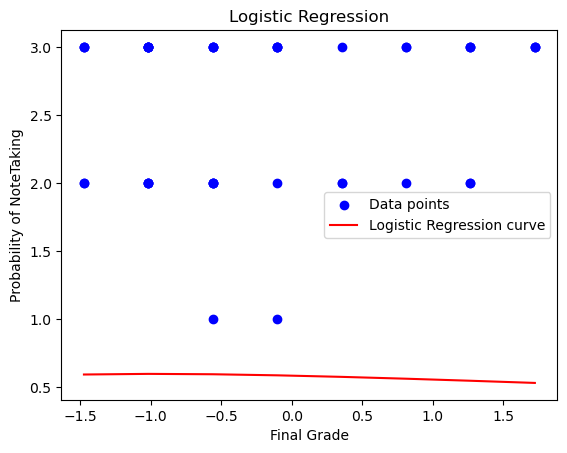

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load data from CSV file
csv_path = 'Resources/StudentsPerformance_with_headers.csv'
data = pd.read_csv(csv_path)

# Display first few rows of the DataFrame to understand its structure
print(data.head())

# Check the distribution of the target variable
print(data['NoteTaking'].value_counts())

# Prepare features and target variable
X = data[['Grade']]  # Add more features here if available
y = data['NoteTaking']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# For multiclass ROC-AUC
if len(np.unique(y)) > 2:
    y_bin = label_binarize(y, classes=np.unique(y))
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    roc_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test), average='macro', multi_class='ovr')
    print(f'ROC-AUC Score: {roc_auc}')

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {cv_scores.mean()}')

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validated accuracy: {grid_search.best_score_}')

# Plot the results (Note: Plotting may need adjustment for multiclass)
sorted_indices = np.argsort(X_test[:, 0])
sorted_X_test = X_test[sorted_indices]
sorted_y_prob = np.max(y_prob[sorted_indices], axis=1)

plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(sorted_X_test, sorted_y_prob, color='red', label='Logistic Regression curve')
plt.title('Logistic Regression')
plt.xlabel('Final Grade')
plt.ylabel('Probability of NoteTaking')
plt.legend()
plt.show()


### **Model Evaluation Summary**

**Data Overview:**
- **Features:** StudentID, Age, Sex, High School Type, Scholarship Type, Additional Work, Extracurricular Activity, Partner Status, Salary, Transportation, and other academic-related attributes.

**Performance Metrics:**
- **ROC-AUC Score:** 0.447 (Indicates limited model ability to distinguish between classes)
- **Cross-Validated Accuracy:** 55.17% (Slightly better than random guessing)
- **Best Parameters:** Regularization parameter \( C = 0.1 \)
- **Best Cross-Validated Accuracy:** 57.43%

**Summary:**
The model exhibits modest performance with a ROC-AUC score of 0.447 and an accuracy of 55.17%. The optimal parameter setting achieved a marginal improvement in accuracy. Further feature engineering, model exploration, and hyperparameter tuning are recommended for enhanced performance.

### III. **Database Design & Implementation**
* *   * * 

The following is the ERDV diagram of our database.

![ERDV](https://i.imgur.com/jvNpA4e.png)

There are 4 tables in total for this database:



1. **Students**
2. **StudentActivities**
3. **AcademicPerformance**
4. **FamilyBackground**


This schema organizes the data into distinct tables that are connected through primary and foreign keys. Each table stores related information, ensuring data integrity and allowing for more efficient queries.

The following is the breakdown for each table, including some reasons for choosing to keep the information we did.


> **`Students`**

- The primary table, and the center of the data, as it is the main focus of the analysis.
- This is where the first primary key is stored: the key that all foreign keys use as reference.
- All of the fields besides the StudentID field are integers— the studentID remains a string.

> **`StudentActivities`**

- A secondary table, with data organized by student activities, to allow for easy insertion of new information and faster queries.
- The StudentID field acts as a foreign key to the StudentID field in the Students table.
- All of the fields besides the StudentID field are integers— the studentID remains a string.

> **`AcademicPerformance`**

- A third table, with data organized by academic performance, to allow for easy insertion of new information and faster queries.
- The StudentID field acts as a foreign key to the StudentID field in the Students table.
- All of the fields besides the StudentID field are integers— the studentID remains a string.

> **`FamilyBackground`**

- A fourth table, with data organized by family background, to allow for easy insertion of new information and faster queries.
- The StudentID field acts as a foreign key to the StudentID field in the Students table.
- All of the fields besides the StudentID field are integers— the studentID remains a string.

With the database built and stored in a .sqlite file, we can now connect to it via sqlalchemy in order to further perform analysis.

In [13]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd


In [14]:
# First create an engine to project4.sqlite.
engine = create_engine("sqlite:///Resources/Project4.sqlite")

# Reflect an existing database into a new model using automap_base.
Base = automap_base()
# Reflect the tables.
Base.prepare(engine)

# Viewing all of the classes that automap found.
Base.classes.keys()


['studentactivities', 'students', 'academicperformance', 'familybackground']

In [15]:
studentactivities_base = Base.classes.studentactivities
familybackground_base = Base.classes.familybackground
academicperformance_base = Base.classes.academicperformance
students_base = Base.classes.students


In [16]:
# Create our session (the link) from Python to the database.
session = Session(engine)


In [17]:
# Linking each dataset to a dataframe via the session query

students_dataset = session.query(students_base.studentid, students_base.studentage, students_base.sex, students_base.graduatedhighschooltype, students_base.scholarshiptype)
studentactivities_dataset = session.query(studentactivities_base.activityid, studentactivities_base.studentid, studentactivities_base.additionalwork, studentactivities_base.artisticorsportsactivity, studentactivities_base.haspartner, studentactivities_base.transportation, studentactivities_base.weeklystudyhours)
familybackground_dataset = session.query(familybackground_base.backgroundid, familybackground_base.studentid, familybackground_base.motherseducation, familybackground_base.fatherseducation, familybackground_base.numberofsiblings, familybackground_base.parentalstatus, familybackground_base.totalsalary)
academicperformance_dataset = session.query(academicperformance_base.performanceid, academicperformance_base.studentid, academicperformance_base.seminarattendance, academicperformance_base.projectimpact, academicperformance_base.classattendance, academicperformance_base.midtermprepaloneorgroup, academicperformance_base.midtermpreptimespent, academicperformance_base.notetaking, academicperformance_base.listeninginclass, academicperformance_base.discussioninterest, academicperformance_base.grade)


In [18]:
students_df = pd.DataFrame(students_dataset)
students_df


studentid  studentage  sex  graduatedhighschooltype  scholarshiptype
0      STUDENT1           2    2                        3                3
1      STUDENT2           2    2                        3                3
2      STUDENT3           2    2                        2                3
3      STUDENT4           1    1                        1                3
4      STUDENT5           2    2                        1                3
..          ...         ...  ...                      ...              ...
140  STUDENT141           2    1                        2                3
141  STUDENT142           1    1                        2                4
142  STUDENT143           1    1                        1                4
143  STUDENT144           2    1                        2                4
144  STUDENT145           1    1                        1                5

[145 rows x 5 columns]

In [19]:
studentactivities_df = pd.DataFrame(studentactivities_dataset)
studentactivities_df


activityid   studentid  additionalwork  artisticorsportsactivity  \
0             1    STUDENT1               1                         2   
1             2    STUDENT2               1                         2   
2             3    STUDENT3               2                         2   
3             4    STUDENT4               1                         2   
4             5    STUDENT5               2                         2   
..          ...         ...             ...                       ...   
140         141  STUDENT141               1                         1   
141         142  STUDENT142               2                         2   
142         143  STUDENT143               2                         2   
143         144  STUDENT144               1                         1   
144         145  STUDENT145               2                         2   

     haspartner  transportation  weeklystudyhours  
0             2               1                 3  
1             2               1                 2  
2             2               4                 2  
3             1               1                 3  
4             1               1                 2  
..          ...             ...               ...  
140           2               1                 3  
141           2               4                 3  
142           2               1                 2  
143           1               2                 2  
144           2               1                 3  

[145 rows x 7 columns]

In [20]:
familybackground_df = pd.DataFrame(familybackground_dataset)
familybackground_df


backgroundid   studentid  motherseducation  fatherseducation  \
0               1    STUDENT1                 1                 2   
1               2    STUDENT2                 2                 3   
2               3    STUDENT3                 2                 2   
3               4    STUDENT4                 1                 2   
4               5    STUDENT5                 3                 3   
..            ...         ...               ...               ...   
140           141  STUDENT141                 1                 2   
141           142  STUDENT142                 1                 1   
142           143  STUDENT143                 3                 4   
143           144  STUDENT144                 4                 4   
144           145  STUDENT145                 3                 1   

     numberofsiblings  parentalstatus  totalsalary  
0                   3               1            1  
1                   2               1            1  
2                   2               1            2  
3                   5               1            2  
4                   2               1            3  
..                ...             ...          ...  
140                 2               2            1  
141                 5               1            1  
142                 4               1            1  
143                 1               1            5  
144                 5               1            3  

[145 rows x 7 columns]

In [21]:
academicperformance_df = pd.DataFrame(academicperformance_dataset)
academicperformance_df


performanceid   studentid  seminarattendance  projectimpact  \
0                1    STUDENT1                  1              1   
1                2    STUDENT2                  1              1   
2                3    STUDENT3                  1              1   
3                4    STUDENT4                  1              1   
4                5    STUDENT5                  1              1   
..             ...         ...                ...            ...   
140            141  STUDENT141                  1              1   
141            142  STUDENT142                  2              1   
142            143  STUDENT143                  1              1   
143            144  STUDENT144                  1              1   
144            145  STUDENT145                  1              1   

     classattendance  midtermprepaloneorgroup  midtermpreptimespent  \
0                  1                        1                     1   
1                  1                        1                     1   
2                  1                        1                     1   
3                  1                        1                     2   
4                  1                        2                     1   
..               ...                      ...                   ...   
140                1                        1                     1   
141                2                        1                     1   
142                1                        1                     1   
143                1                        2                     1   
144                1                        2                     1   

     notetaking  listeninginclass  discussioninterest  grade  
0             3                 2                   1      1  
1             3                 2                   3      1  
2             2                 2                   1      1  
3             3                 2                   2      1  
4             2                 2                   2      1  
..          ...               ...                 ...    ...  
140           2                 1                   2      5  
141           3                 2                   2      5  
142           3                 3                   2      1  
143           2                 1                   2      4  
144           3                 2                   3      3  

[145 rows x 11 columns]

In [22]:
dfs = [students_df, studentactivities_df, familybackground_df, academicperformance_df]
dfs = [df.set_index('studentid') for df in dfs]
student_performance = dfs[0].join(dfs[1:])


In [23]:
student_performance


studentage  sex  graduatedhighschooltype  scholarshiptype  \
studentid                                                               
STUDENT1             2    2                        3                3   
STUDENT2             2    2                        3                3   
STUDENT3             2    2                        2                3   
STUDENT4             1    1                        1                3   
STUDENT5             2    2                        1                3   
...                ...  ...                      ...              ...   
STUDENT141           2    1                        2                3   
STUDENT142           1    1                        2                4   
STUDENT143           1    1                        1                4   
STUDENT144           2    1                        2                4   
STUDENT145           1    1                        1                5   

            activityid  additionalwork  artisticorsportsactivity  haspartner  \
studentid                                                                      
STUDENT1             1               1                         2           2   
STUDENT2             2               1                         2           2   
STUDENT3             3               2                         2           2   
STUDENT4             4               1                         2           1   
STUDENT5             5               2                         2           1   
...                ...             ...                       ...         ...   
STUDENT141         141               1                         1           2   
STUDENT142         142               2                         2           2   
STUDENT143         143               2                         2           2   
STUDENT144         144               1                         1           1   
STUDENT145         145               2                         2           2   

            transportation  weeklystudyhours  ...  performanceid  \
studentid                                     ...                  
STUDENT1                 1                 3  ...              1   
STUDENT2                 1                 2  ...              2   
STUDENT3                 4                 2  ...              3   
STUDENT4                 1                 3  ...              4   
STUDENT5                 1                 2  ...              5   
...                    ...               ...  ...            ...   
STUDENT141               1                 3  ...            141   
STUDENT142               4                 3  ...            142   
STUDENT143               1                 2  ...            143   
STUDENT144               2                 2  ...            144   
STUDENT145               1                 3  ...            145   

            seminarattendance  projectimpact  classattendance  \
studentid                                                       
STUDENT1                    1              1                1   
STUDENT2                    1              1                1   
STUDENT3                    1              1                1   
STUDENT4                    1              1                1   
STUDENT5                    1              1                1   
...                       ...            ...              ...   
STUDENT141                  1              1                1   
STUDENT142                  2              1                2   
STUDENT143                  1              1                1   
STUDENT144                  1              1                1   
STUDENT145                  1              1                1   

            midtermprepaloneorgroup  midtermpreptimespent  notetaking  \
studentid                                                               
STUDENT1                          1                     1           3   
STUDENT2                          1                     1           3  

In [24]:
student_performance.reset_index(inplace=True)
student_performance


studentid  studentage  sex  graduatedhighschooltype  scholarshiptype  \
0      STUDENT1           2    2                        3                3   
1      STUDENT2           2    2                        3                3   
2      STUDENT3           2    2                        2                3   
3      STUDENT4           1    1                        1                3   
4      STUDENT5           2    2                        1                3   
..          ...         ...  ...                      ...              ...   
140  STUDENT141           2    1                        2                3   
141  STUDENT142           1    1                        2                4   
142  STUDENT143           1    1                        1                4   
143  STUDENT144           2    1                        2                4   
144  STUDENT145           1    1                        1                5   

     activityid  additionalwork  artisticorsportsactivity  haspartner  \
0             1               1                         2           2   
1             2               1                         2           2   
2             3               2                         2           2   
3             4               1                         2           1   
4             5               2                         2           1   
..          ...             ...                       ...         ...   
140         141               1                         1           2   
141         142               2                         2           2   
142         143               2                         2           2   
143         144               1                         1           1   
144         145               2                         2           2   

     transportation  ...  performanceid  seminarattendance  projectimpact  \
0                 1  ...              1                  1              1   
1                 1  ...              2                  1              1   
2                 4  ...              3                  1              1   
3                 1  ...              4                  1              1   
4                 1  ...              5                  1              1   
..              ...  ...            ...                ...            ...   
140               1  ...            141                  1              1   
141               4  ...            142                  2              1   
142               1  ...            143                  1              1   
143               2  ...            144                  1              1   
144               1  ...            145                  1              1   

     classattendance  midtermprepaloneorgroup  midtermpreptimespent  \
0                  1                        1                     1   
1                  1                        1                     1   
2                  1                        1                     1   
3                  1                        1                     2   
4                  1                        2                     1   
..               ...                      ...                   ...   
140                1                        1                     1   
141                2                        1                     1   
142                1                        1                     1   
143                1                        2                     1   
144                1                        2                     1   

     notetaking  listeninginclass  discussioninterest  grade  
0             3                 2                   1      1  
1             3                 2                   3      1  
2             2                 2                   1      1  
3             3                 2                   2      1  
4             2                 2                   2      1  
..          ...               ...   

### IV. **Data Modeling**
* *   * * 

##### **Rachel's Model**

##### **1. Data Preparation**


Before we could load the data into tables, we first had to clean the datasets given to us. This was done already in the Exploratory Data Analysis step, but from there, we further eliminated any non-necessary elements in order to perform machine learning, most notably the dataset ids (performanceid, activityid, backgroundid) that were merged.
* *   * * 

To start with, we wanted to look at the correlation matrix between grades and the other variables.

In [25]:
import numpy as np

# Define features and target variable
X = master_df.drop(columns=['Grade','StudentID','Grade_Label'])
y = master_df['Grade']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Calculate R-squared value
r_square = r2_score(y_test, y_pred)

print(f'R-squared value: {r_square:.2f}')


R-squared value: -0.46


It's a low correlation, but perhaps we can find something else if we keep going.

##### **2. Training the model**


In [26]:
data_cm = student_performance.copy()
data_cm = data_cm.drop(['studentid'], axis=1)
corr_fs = data_cm.corr()
corr_fs_grade = corr_fs['grade']
value_corr = 1.5*corr_fs_grade.mean()


In [27]:
data_corr = student_performance.copy()
data_corr = data_corr.drop('studentid', axis= 1)

corr_ = data_corr.corr()['grade']
columns_corr = [corr_fs_grade.index[i] for i, value in enumerate(corr_) if value > value_corr or value < - value_corr]

# We don't need any of the ID columns, so we'll remove those.
columns_corr.remove('activityid')
columns_corr.remove('performanceid')
columns_corr.remove('backgroundid')
columns_corr


['sex',
 'graduatedhighschooltype',
 'additionalwork',
 'transportation',
 'totalsalary',
 'seminarattendance',
 'projectimpact',
 'classattendance',
 'discussioninterest',
 'grade']

#### **Splitting the data**

We'll start by splitting the data via train_test_split.

In doing so, you split the dataset (X,y) into a training set (80%), and a test set (20%).
It's a quick and efficient way of preparing data for machine learning models.


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data_fs = student_performance.copy()
data_fs = data_fs.iloc[:,1:]

# we don't need the table ids for this, so we'll remove activityid, backgroundid, and performanceid.

data_fs = data_fs.drop('activityid', axis=1)
data_fs = data_fs.drop('backgroundid', axis=1)
data_fs = data_fs.drop('performanceid', axis=1)

def change_grades_num(grade):
    if grade in [0,1,2,3]:
        # 'DD','DC','CC','CB'
        return 0.0
    elif grade in [4,5,6,7]:
        # 'BB','BA','AA'
        return 1.0

data_fs['grade'] = data_fs['grade'].apply(lambda x: change_grades_num(x))

X_fs = data_fs.drop('grade', axis=1)
y_fs = data_fs['grade']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.33, random_state=42)


#### **Filter-Based Approach**

From here, we can begin to try different ways of feature selection.

Below, we're trying a filter-based approach of supervised learning, the mutual_info_classif function.

One positive of using this method is that it's faster than using a wrapper method, and more generalized. It's also easier to interpret: a feature is discarded if it has no statistical relationship to the target. However, filter methods have a major drawback— they look at each feature in isolation, evaluating its relation to the target. This makes them prone to discarding useful features that are weak predictors of the target on their own, but add value to the model when combined with others.

But, since we're doing this project for the sake of education, let's try it anyway.

In [29]:

from sklearn.feature_selection import mutual_info_classif
importances_MIF = mutual_info_classif(X_train_fs,y_train_fs)
df_MIF = pd.DataFrame({"Features": data_fs.columns[:-1],'Importance':importances_MIF})
df_MIF = df_MIF.sort_values('Importance', ascending=False, ignore_index=True)
df_MIF_filter = df_MIF[(df_MIF.Importance > 0)]
features_MIF = list(df_MIF_filter.Features)
features_MIF.append('grade')
features_MIF


['totalsalary',
 'graduatedhighschooltype',
 'additionalwork',
 'sex',
 'studentage',
 'discussioninterest',
 'notetaking',
 'midtermprepaloneorgroup',
 'seminarattendance',
 'midtermpreptimespent',
 'projectimpact',
 'grade']

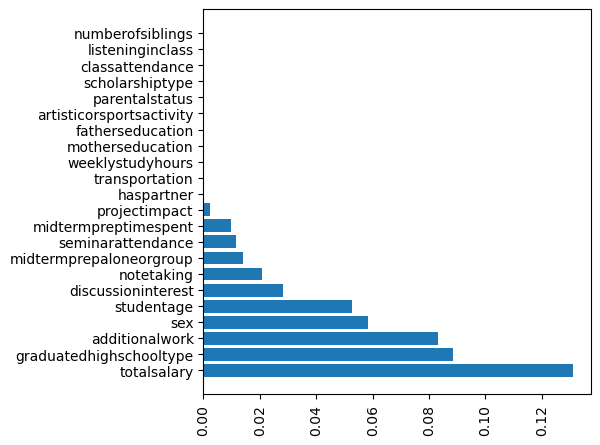

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.barh(df_MIF.Features, df_MIF.Importance)
#plt.title()
plt.xticks(rotation=90)
plt.show()


So, according to the mutual_info_classif result in these particular train and test buckets, the last bar would be the most "important" feature.

#### **Wrapper-Based Approach**

From here, let's try a new approach using a wrapper-based method.

We'll use a Random Forest Classifier first, and then follow up with a Logistic Regression model.

In [31]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_fs, y_train_fs)
importances_RFC = model.feature_importances_
df_RFC = pd.DataFrame({"Features": data_fs.columns[:-1],'Importance':importances_RFC})
df_RFC = df_RFC.sort_values('Importance', ascending=False, ignore_index=True)
df_RFC_filter = df_RFC[(df_RFC.Importance > importances_RFC.mean())]
features_RFC = list(df_RFC_filter.Features[:14])
features_RFC.append('grade')
features_RFC


['fatherseducation',
 'motherseducation',
 'scholarshiptype',
 'numberofsiblings',
 'artisticorsportsactivity',
 'studentage',
 'weeklystudyhours',
 'sex',
 'totalsalary',
 'listeninginclass',
 'grade']

In [32]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=10, n_jobs=-1, max_iter=500)
fss = SequentialFeatureSelector(lr, k_features='best', forward=True, n_jobs=-1)
fss.fit(X_train_fs, y_train_fs)
features_FSS = list(fss.k_feature_names_)
features_FSS.append('grade')
features_FSS


/opt/anaconda3/envs/inclassfeb2024/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/inclassfeb2024/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/inclassfeb2024/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/inclassfeb2024/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/inclassfeb2024/lib/p

['studentage',
 'sex',
 'graduatedhighschooltype',
 'scholarshiptype',
 'artisticorsportsactivity',
 'weeklystudyhours',
 'numberofsiblings',
 'parentalstatus',
 'totalsalary',
 'projectimpact',
 'midtermprepaloneorgroup',
 'midtermpreptimespent',
 'grade']

Above are the features the algorithm selected as the features worth looking at. These will come in handy when we train the model.

In [33]:
fss.k_score_


0.7131578947368421

So, this model has a prediction accuracy of about 71% using the wrapper approach with a random forest classifier.

Now, what would happen if we tried training the model with all of the features?

In [34]:
all_features = []
features = [columns_corr, features_MIF, features_FSS, features_RFC]


for feature in features:
    for i in range(len(feature)):
        if not feature[i] == 'grade': 
            all_features.append(feature[i])

all_features


['sex',
 'graduatedhighschooltype',
 'additionalwork',
 'transportation',
 'totalsalary',
 'seminarattendance',
 'projectimpact',
 'classattendance',
 'discussioninterest',
 'totalsalary',
 'graduatedhighschooltype',
 'additionalwork',
 'sex',
 'studentage',
 'discussioninterest',
 'notetaking',
 'midtermprepaloneorgroup',
 'seminarattendance',
 'midtermpreptimespent',
 'projectimpact',
 'studentage',
 'sex',
 'graduatedhighschooltype',
 'scholarshiptype',
 'artisticorsportsactivity',
 'weeklystudyhours',
 'numberofsiblings',
 'parentalstatus',
 'totalsalary',
 'projectimpact',
 'midtermprepaloneorgroup',
 'midtermpreptimespent',
 'fatherseducation',
 'motherseducation',
 'scholarshiptype',
 'numberofsiblings',
 'artisticorsportsactivity',
 'studentage',
 'weeklystudyhours',
 'sex',
 'totalsalary',
 'listeninginclass']

In [35]:
values, counts = np.unique(all_features, return_counts=True)
df_all_features = pd.DataFrame({"Features": values,'Count':counts})
df_all_features = df_all_features.sort_values(by='Count', ascending=False, ignore_index=True)
df_all_features


Features  Count
0                totalsalary      4
1                        sex      4
2                 studentage      3
3    graduatedhighschooltype      3
4              projectimpact      3
5             additionalwork      2
6   artisticorsportsactivity      2
7          seminarattendance      2
8            scholarshiptype      2
9           numberofsiblings      2
10          weeklystudyhours      2
11      midtermpreptimespent      2
12   midtermprepaloneorgroup      2
13        discussioninterest      2
14          motherseducation      1
15            parentalstatus      1
16          listeninginclass      1
17          fatherseducation      1
18           classattendance      1
19            transportation      1
20                notetaking      1

In [36]:
all_features_fs = list(df_all_features.Features[:11])
all_features_fs.append('grade')
all_features_fs


['totalsalary',
 'sex',
 'studentage',
 'graduatedhighschooltype',
 'projectimpact',
 'additionalwork',
 'artisticorsportsactivity',
 'seminarattendance',
 'scholarshiptype',
 'numberofsiblings',
 'weeklystudyhours',
 'grade']

##### **3. Modeling the Data**
  
  We'll start with importing our dependencies.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix


From here, we choose which feature selection to use, and apply it to the data model.

In [38]:
data_ml = student_performance.copy()
data_ml = data_ml.iloc[:,1:]

data_ml_corr = data_ml[columns_corr]
data_ml_MIF = data_ml[features_MIF]
data_ml_wrapper_FSS = data_ml[features_FSS]
data_ml_embedded_RFC = data_ml[features_RFC]
data_all_features = data_ml[all_features_fs]

# choose the feature selection here
data_model = data_ml_wrapper_FSS

data_model['grade'] = data_model['grade'].apply(lambda x: change_grades_num(x))
data_model


studentage  sex  graduatedhighschooltype  scholarshiptype  \
0             2    2                        3                3   
1             2    2                        3                3   
2             2    2                        2                3   
3             1    1                        1                3   
4             2    2                        1                3   
..          ...  ...                      ...              ...   
140           2    1                        2                3   
141           1    1                        2                4   
142           1    1                        1                4   
143           2    1                        2                4   
144           1    1                        1                5   

     artisticorsportsactivity  weeklystudyhours  numberofsiblings  \
0                           2                 3                 3   
1                           2                 2                 2   
2                           2                 2                 2   
3                           2                 3                 5   
4                           2                 2                 2   
..                        ...               ...               ...   
140                         1                 3                 2   
141                         2                 3                 5   
142                         2                 2                 4   
143                         1                 2                 1   
144                         2                 3                 5   

     parentalstatus  totalsalary  projectimpact  midtermprepaloneorgroup  \
0                 1            1              1                        1   
1                 1            1              1                        1   
2                 1            2              1                        1   
3                 1            2              1                        1   
4                 1            3              1                        2   
..              ...          ...            ...                      ...   
140               2            1              1                        1   
141               1            1              1                        1   
142               1            1              1                        1   
143               1            5              1                        2   
144               1            3              1                        2   

     midtermpreptimespent  grade  
0                       1    0.0  
1                       1    0.0  
2                       1    0.0  
3                       2    0.0  
4                       1    0.0  
..                    ...    ...  
140                     1    1.0  
141                     1    1.0  
142                     1    0.0  
143                     1    1.0  
144                     1    0.0  

[145 rows x 13 columns]

Next, we'll scale the data.

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[ 0.62076591,  0.81649658,  1.97095572, ...,  0.80849333,
        -0.08205236, -2.31314559],
       [ 0.62076591,  0.81649658,  1.97095572, ...,  0.80849333,
        -0.08205236,  1.00770699],
       [ 0.62076591,  0.81649658,  0.10305651, ..., -0.96774202,
        -0.08205236, -2.31314559],
       ...,
       [-1.01579877, -1.22474487, -1.7648427 , ...,  0.80849333,
         1.40514668, -0.6527193 ],
       [ 0.62076591, -1.22474487,  0.10305651, ..., -0.96774202,
        -1.5692514 , -0.6527193 ],
       [-1.01579877, -1.22474487, -1.7648427 , ...,  0.80849333,
        -0.08205236,  1.00770699]])

And begin to train the actual model.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [41]:
def modeling(X_train, X_test, y_train, y_test):
    models_scores = pd.DataFrame(columns=['Model','Accuracy','Confusion Matrix'])
    models = [LinearSVC(),SGDClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
    
    for i, model in enumerate(models):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cf_matrix = confusion_matrix(y_test, y_pred)
        row = pd.DataFrame([{'Model':str(model),'Accuracy':acc,'Confusion Matrix':cf_matrix}])
        models_scores = pd.concat([models_scores, row], ignore_index=True)
    models_scores.sort_values(by='Accuracy', ascending=False, ignore_index=True)
    return models_scores
    
models_scores = modeling(X_train, X_test, y_train, y_test)
models_scores.sort_values(by='Accuracy', ascending=False, ignore_index=True)


Model  Accuracy  \
0  RandomForestClassifier()  0.295455   
1    KNeighborsClassifier()  0.250000   
2               LinearSVC()  0.204545   
3           SGDClassifier()  0.204545   
4  DecisionTreeClassifier()  0.181818   

                                    Confusion Matrix  
0  [[1, 4, 0, 0, 0, 0, 0, 0], [0, 5, 2, 0, 0, 2, ...  
1  [[1, 2, 1, 0, 0, 0, 0, 1], [0, 5, 2, 0, 0, 1, ...  
2  [[0, 2, 1, 1, 0, 0, 1, 0], [0, 2, 4, 0, 0, 3, ...  
3  [[1, 2, 1, 0, 0, 0, 0, 1], [0, 2, 4, 0, 0, 3, ...  
4  [[1, 1, 2, 0, 0, 1, 0, 0], [0, 1, 2, 1, 3, 2, ...

These accuracies are pretty pathetic. Let's see if we can improve them.

##### **4. Model Optimization and Evaluation**
  

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)
models_scores = modeling(X_train, X_test, y_train, y_test)
models_scores.sort_values(by='Accuracy', ascending=False, ignore_index=True)


Model  Accuracy  \
0  RandomForestClassifier()  0.227273   
1           SGDClassifier()  0.204545   
2               LinearSVC()  0.181818   
3  DecisionTreeClassifier()  0.181818   
4    KNeighborsClassifier()  0.181818   

                                    Confusion Matrix  
0  [[0, 2, 1, 0, 0, 0, 0, 0], [0, 4, 1, 1, 0, 2, ...  
1  [[0, 0, 0, 0, 0, 2, 0, 1], [0, 0, 0, 3, 2, 3, ...  
2  [[0, 2, 0, 1, 0, 0, 0, 0], [1, 0, 0, 3, 1, 2, ...  
3  [[0, 2, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 5, ...  
4  [[1, 1, 1, 0, 0, 0, 0, 0], [0, 3, 0, 2, 0, 2, ...

* *   * * 
##### **Andrea's Model**

I tried to use a deep neural network model to predict whether a student's grade is above or below C. It involves the following steps:

- Data Preparation: Unnecessary columns are dropped, and grades are converted into a binary label (GradeC). Relevant features are retained and categorical variables are one-hot encoded.

- Data Splitting and Scaling: The data is split into training and testing sets, and the features are scaled for better model performance.

- Model Definition: A deep neural network with three hidden layers is defined. The model uses ReLU activation in hidden layers and a sigmoid activation in the output layer for binary classification.

- Training and Evaluation: The model is compiled using the adam optimizer and trained for 200 epochs. It is then evaluated on the test set, achieving an accuracy of approximately 54%.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [44]:
# Drop the ID and label columns
df_for_model= student_performance.drop(columns=['studentid','performanceid'])
df_for_model.head()


studentage  sex  graduatedhighschooltype  scholarshiptype  activityid  \
0           2    2                        3                3           1   
1           2    2                        3                3           2   
2           2    2                        2                3           3   
3           1    1                        1                3           4   
4           2    2                        1                3           5   

   additionalwork  artisticorsportsactivity  haspartner  transportation  \
0               1                         2           2               1   
1               1                         2           2               1   
2               2                         2           2               4   
3               1                         2           1               1   
4               2                         2           1               1   

   weeklystudyhours  ...  totalsalary  seminarattendance  projectimpact  \
0                 3  ...            1                  1              1   
1                 2  ...            1                  1              1   
2                 2  ...            2                  1              1   
3                 3  ...            2                  1              1   
4                 2  ...            3                  1              1   

   classattendance  midtermprepaloneorgroup  midtermpreptimespent  notetaking  \
0                1                        1                     1           3   
1                1                        1                     1           3   
2                1                        1                     1           2   
3                1                        1                     2           3   
4                1                        2                     1           2   

   listeninginclass  discussioninterest  grade  
0                 2                   1      1  
1                 2                   3      1  
2                 2                   1      1  
3                 2                   2      1  
4                 2                   2      1  

[5 rows x 25 columns]

In [45]:
# Split grade into 0 = below Grade C, 1 = Above Grade C
df_for_model['GradeC'] = np.where(df_for_model['grade'] <= 2, 0, 1)

# Drop useless columns, only keep columns seems to be correlated
columns_to_keep = ['additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 
                   'classattendance', 'discussioninterest', 'totalsalary', 'graduatedhighschooltype', 'GradeC']
df_for_model_encode = df_for_model[columns_to_keep]

# Convert categorical data to numeric using pd.get_dummies
df_for_model_encode = pd.get_dummies(df_for_model_encode, columns=['additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 'classattendance', 'discussioninterest', 'totalsalary','graduatedhighschooltype', 'GradeC'])

df_for_model_encode


additionalwork_1  additionalwork_2  transportation_1  transportation_2  \
0                True             False              True             False   
1                True             False              True             False   
2               False              True             False             False   
3                True             False              True             False   
4               False              True              True             False   
..                ...               ...               ...               ...   
140              True             False              True             False   
141             False              True             False             False   
142             False              True              True             False   
143              True             False             False              True   
144             False              True              True             False   

     transportation_3  transportation_4  seminarattendance_1  \
0               False             False                 True   
1               False             False                 True   
2               False              True                 True   
3               False             False                 True   
4               False             False                 True   
..                ...               ...                  ...   
140             False             False                 True   
141             False              True                False   
142             False             False                 True   
143             False             False                 True   
144             False             False                 True   

     seminarattendance_2  projectimpact_1  projectimpact_2  ...  \
0                  False             True            False  ...   
1                  False             True            False  ...   
2                  False             True            False  ...   
3                  False             True            False  ...   
4                  False             True            False  ...   
..                   ...              ...              ...  ...   
140                False             True            False  ...   
141                 True             True            False  ...   
142                False             True            False  ...   
143                False             True            False  ...   
144                False             True            False  ...   

     totalsalary_1  totalsalary_2  totalsalary_3  totalsalary_4  \
0             True          False          False          False   
1             True          False          False          False   
2            False           True          False          False   
3            False           True          False          False   
4            False          False           True          False   
..             ...            ...            ...            ...   
140           True          False          False          False   
141           True          False          False          False   
142           True          False          False          False   
143          False          False          False          False   
144          False          False           True          False   

     totalsalary_5  graduatedhighschooltype_1  graduatedhighschooltype_2  \
0            False                      False                      False   
1            False                      False                      False   
2            False                      False                       True   
3            False                       True                      False   
4            False                       True                      False   
..             ...                        ...                        ...   
140          False                      False                       True   
141          False                      False                       T

In [46]:
# Split our preprocessed data into our features and target arrays
X = df_for_model_encode.drop(columns=['GradeC_0','GradeC_1'])
y = df_for_model_encode[['GradeC_1']]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [47]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,851 (34.57 KB)

 Trainable params: 8,851 (34.57 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [50]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5488 - loss: 0.7317  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6170 - loss: 0.6716 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.6936 - loss: 0.6429
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.7708 - loss: 0.6093
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.7631 - loss: 0.5908
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7522 - loss: 0.5732
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8023 - loss: 0.5443
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7987 - loss: 0.5431
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7867 - loss: 0.5231
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8145 - loss: 0.5007
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.8124 - loss: 0.4934
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


2/2 - 0s - 29ms/step - accuracy: 0.6216 - loss: 1.4265
Loss: 1.4265460968017578, Accuracy: 0.6216216087341309


##### Model Optimization - Second Attempt

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 200)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,541 (91.96 KB)

 Trainable params: 23,541 (91.96 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [54]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5333 - loss: 0.6786  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.7442 - loss: 0.6096
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8227 - loss: 0.5574
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8270 - loss: 0.5063
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.7910 - loss: 0.5025
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8192 - loss: 0.4725
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8104 - loss: 0.4883 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4773 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8094 - loss: 0.4408 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8225 - loss: 0.4380 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8387 - loss: 0.4278
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.8

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


2/2 - 0s - 29ms/step - accuracy: 0.7027 - loss: 1.2495
Loss: 1.249517798423767, Accuracy: 0.7027027010917664


##### Model Optimization - Third Attempt

Trying to add additional column with stronger correlation - sex.

In [56]:
# Drop useless columns, only keep columns seems to be correlated, adding sex 
columns_to_keep = ['sex','additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 
                   'classattendance', 'discussioninterest', 'totalsalary', 'graduatedhighschooltype', 'GradeC']
df_for_model_opt_encode = df_for_model[columns_to_keep]

# Convert categorical data to numeric using pd.get_dummies
df_for_model_opt_encode = pd.get_dummies(df_for_model_opt_encode, columns=['sex','additionalwork', 'transportation', 'seminarattendance', 'projectimpact', 'classattendance', 'discussioninterest', 'totalsalary','graduatedhighschooltype', 'GradeC'])

df_for_model_opt_encode


sex_1  sex_2  additionalwork_1  additionalwork_2  transportation_1  \
0    False   True              True             False              True   
1    False   True              True             False              True   
2    False   True             False              True             False   
3     True  False              True             False              True   
4    False   True             False              True              True   
..     ...    ...               ...               ...               ...   
140   True  False              True             False              True   
141   True  False             False              True             False   
142   True  False             False              True              True   
143   True  False              True             False             False   
144   True  False             False              True              True   

     transportation_2  transportation_3  transportation_4  \
0               False             False             False   
1               False             False             False   
2               False             False              True   
3               False             False             False   
4               False             False             False   
..                ...               ...               ...   
140             False             False             False   
141             False             False              True   
142             False             False             False   
143              True             False             False   
144             False             False             False   

     seminarattendance_1  seminarattendance_2  ...  totalsalary_1  \
0                   True                False  ...           True   
1                   True                False  ...           True   
2                   True                False  ...          False   
3                   True                False  ...          False   
4                   True                False  ...          False   
..                   ...                  ...  ...            ...   
140                 True                False  ...           True   
141                False                 True  ...           True   
142                 True                False  ...           True   
143                 True                False  ...          False   
144                 True                False  ...          False   

     totalsalary_2  totalsalary_3  totalsalary_4  totalsalary_5  \
0            False          False          False          False   
1            False          False          False          False   
2             True          False          False          False   
3             True          False          False          False   
4            False           True          False          False   
..             ...            ...            ...            ...   
140          False          False          False          False   
141          False          False          False          False   
142          False          False          False          False   
143          False          False          False           True   
144          False           True          False          False   

     graduatedhighschooltype_1  graduatedhighschooltype_2  \
0                        False                      False   
1                        False                      False   
2                        False                       True   
3                         True                      False   
4                         True                      False   
..                         ...                        ...   
140                      False                       True   
141                      False                       True   
142                       True                      False   
143                      False                       True   
144                       True                      False   

    

In [57]:
# Split our preprocessed data into our features and target arrays
X = df_for_model_opt_encode.drop(columns=['GradeC_0','GradeC_1'])
y = df_for_model_opt_encode[['GradeC_1']]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [58]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer. Adjusted the model by increasing the number of neurons and added more hidden layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 200)            │         5,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,941 (93.52 KB)

 Trainable params: 23,941 (93.52 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [61]:
# Train the model - Added the number of epochs to the training regimen
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5494 - loss: 0.7142  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.7615 - loss: 0.6256
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8029 - loss: 0.5684
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8088 - loss: 0.5438
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8301 - loss: 0.4952 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8244 - loss: 0.4618 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8281 - loss: 0.4592
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8402 - loss: 0.4066
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8731 - loss: 0.3985
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8664 - loss: 0.4050
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.8951 - loss: 0.3634
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


2/2 - 0s - 31ms/step - accuracy: 0.6757 - loss: 1.3022
Loss: 1.3022083044052124, Accuracy: 0.6756756901741028


In [63]:
# Export our model to HDF5 file
nn.save("Andrea_Model.h5")


##### Results

The third attempt has the highest accuracy of 64.9%. 

### **Hyperparameter Tuning Model by Mahalel Peter**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load your data
# X, y = load_data()

# Experiment with different splits
splits = [0.2, 0.3, 0.4]  # Different split ratios for training and validation

# Different configurations to try
layer_configs = [2, 3, 4]  # Number of hidden layers
activations = ['relu', 'tanh']  # Activation functions
learning_rates = [0.001, 0.0005, 0.0001]  # Different learning rates
epochs = [50, 100]  # Number of epochs

def create_model(layers, activation, optimizer, input_shape):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_shape=(input_shape,)))
    for _ in range(layers):
        model.add(Dense(units=64, activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))  # Adjust this if doing multi-class classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(X_train, y_train, X_val, y_val, layers, activation, learning_rate, epochs):
    input_shape = X_train.shape[1]
    optimizer = Adam(learning_rate=learning_rate)
    model = create_model(layers, activation, optimizer, input_shape)
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

    y_pred_prob = model.predict(X_val)
    y_pred = (y_pred_prob > 0.5).astype('int32')

    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)

    return cm, cr, history

# Iterate over different configurations
for split in splits:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=split, random_state=42)

    for layers in layer_configs:
        for activation in activations:
            for learning_rate in learning_rates:
                for epoch in epochs:
                    print(f"Evaluating configuration: Layers={layers}, Activation={activation}, Learning Rate={learning_rate}, Epochs={epoch}, Split={split}")

                    cm, cr, history = train_and_evaluate(X_train, y_train, X_val, y_val, layers, activation, learning_rate, epoch)

                    print(f"Confusion Matrix:\n{cm}")
                    print(f"Classification Report:\n{cr}")


Evaluating configuration: Layers=2, Activation=relu, Learning Rate=0.001, Epochs=50, Split=0.2
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5301 - loss: 0.6977 - val_accuracy: 0.6207 - val_loss: 0.6774
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6080 - loss: 0.6737 - val_accuracy: 0.5862 - val_loss: 0.6780
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7352 - loss: 0.6576 - val_accuracy: 0.6552 - val_loss: 0.6743
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7341 - loss: 0.6342 - val_accuracy: 0.6897 - val_loss: 0.6608
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7019 - loss: 0.6245 - val_accuracy: 0.6897 - val_loss: 0.6460
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6866 - loss: 0.6169 - val_accuracy: 0.6897 - val_loss: 0.6343
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6897 - loss: 0.6064 - val_accuracy: 0.6897 - val_loss: 0.6408
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[ 8  3]
 [ 7 11]]
Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.73      0.62        11
        True       0.79      0.61      0.69        18

    accuracy                           0.66        29
   macro avg       0.66      0.67      0.65        29
weighted avg       0.69      0.66      0.66        29

Evaluating configuration: Layers=2, Activation=relu, Learning Rate=0.0001, Epochs=100, Split=0.2
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5884 - loss: 0.6814 - val_accuracy: 0.6207 - val_loss: 0.6744
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5870 - loss: 0.6866 - val_accuracy: 0.6552 - val_loss: 0.6733
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5800 - loss: 0.6822 - val_accuracy: 0.6552 - val_loss: 0.6721
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5803 - loss: 0.6839 - val_accuracy: 0.6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[ 9  2]
 [ 8 10]]
Classification Report:
              precision    recall  f1-score   support

       False       0.53      0.82      0.64        11
        True       0.83      0.56      0.67        18

    accuracy                           0.66        29
   macro avg       0.68      0.69      0.65        29
weighted avg       0.72      0.66      0.66        29

Evaluating configuration: Layers=2, Activation=tanh, Learning Rate=0.001, Epochs=50, Split=0.2
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4701 - loss: 0.7145 - val_accuracy: 0.7586 - val_loss: 0.6152
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6056 - loss: 0.6559 - val_accuracy: 0.7241 - val_loss: 0.6122
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7009 - loss: 0.6247 - val_accuracy: 0.7241 - val_loss: 0.6170
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6977 - loss: 0.5966 - val_accuracy: 0.7241 - 

### **Summary of Model**

**Configuration 1:**
- **Layers**: 2, **Activation**: ReLU, **Learning Rate**: 0.001, **Epochs**: 50, **Test Split**: 20%
- **Training Accuracy**: ~71.47%
- **Validation Accuracy**: ~65.52%
- **Confusion Matrix**:
  \[
  \begin{bmatrix}
  8 & 3 \\
  7 & 11
  \end{bmatrix}
  \]
- **Performance Summary**: The model demonstrates a balanced performance with moderate accuracy and recall. It shows reasonable predictive power but fluctuates in validation performance.

**Configuration 2:**
- **Layers**: 2, **Activation**: ReLU, **Learning Rate**: 0.0001, **Epochs**: 100, **Test Split**: 20%
- **Training Accuracy**: ~77.63%
- **Validation Accuracy**: ~65.52%
- **Confusion Matrix**:
  \[
  \begin{bmatrix}
  9 & 2 \\
  8 & 10
  \end{bmatrix}
  \]
- **Performance Summary**: This configuration achieves the highest training accuracy, indicating effective learning. It maintains a similar validation accuracy to Configuration 1, with improved precision for the positive class.

**Configuration 3:**
- **Layers**: 2, **Activation**: Tanh, **Learning Rate**: 0.001, **Epochs**: 50, **Test Split**: 20%
- **Training Accuracy**: ~74.58%
- **Validation Accuracy**: ~72.41%
- **Confusion Matrix**:
  \[
  \begin{bmatrix}
  9 & 5 \\
  4 & 20
  \end{bmatrix}
  \]
- **Performance Summary**: Configuration 3 yields the highest validation accuracy and offers a well-balanced performance in terms of precision and recall. This configuration provides the best overall model performance on the validation set.

**Conclusion**: Configuration 3 is the most effective in terms of validation accuracy and balanced performance metrics, while Configuration 2 excels in training accuracy. The choice of configuration should align with specific performance objectives and requirements.




### **Fixed Configuration Neural Network Model by Mahalel Peter**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# Step 1: Load Your Data
# Example with a CSV file; replace with your data loading method
# data = pd.read_csv('your_data.csv')

# Assuming you have columns 'feature1', 'feature2', ..., and a target column 'target'
# X = data[['feature1', 'feature2', ...]].values
# y = data['target'].values

# Example data (for demonstration purposes)
# Replace this with actual data loading and preprocessing
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, size=1000)  # Binary classification

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

# Step 6: Evaluate the Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Save the Model
model.save('my_model.h5')


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4590 - loss: 0.6995 - val_accuracy: 0.5750 - val_loss: 0.6891
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5416 - loss: 0.6925 - val_accuracy: 0.6250 - val_loss: 0.6885
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5397 - loss: 0.6899 - val_accuracy: 0.5625 - val_loss: 0.6895
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5797 - loss: 0.6867 - val_accuracy: 0.5625 - val_loss: 0.6883
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.5410 - loss: 0.6869 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5392 - loss: 0.6861 - val_accuracy: 0.6000 - val_loss: 0.6871
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.5574 - loss: 0.6878 - val_accuracy: 0.5500 - val_loss: 0.6947
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.5868 - loss: 0.6815 - val_accuracy: 0.5500 - val

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.40      0.44       102
           1       0.47      0.55      0.51        98

    accuracy                           0.47       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



### **Model Evaluation Summary**

**Configuration Details:**
- **Epochs**: 50
- **Training Data Split**: Presumably 80/20 (Training/Validation)

**Performance Metrics:**
- **Final Training Accuracy**: ~58.85%
- **Final Validation Accuracy**: ~50.00%
- **Confusion Matrix**:
  \[
  \begin{bmatrix}
  41 & 61 \\
  44 & 54
  \end{bmatrix}
  \]
- **Classification Report**:
  - **Precision**:
    - Class 0: 0.48
    - Class 1: 0.47
  - **Recall**:
    - Class 0: 0.40
    - Class 1: 0.55
  - **F1-Score**:
    - Class 0: 0.44
    - Class 1: 0.51
  - **Overall Accuracy**: 0.47
  - **Macro Average F1-Score**: 0.47
  - **Weighted Average F1-Score**: 0.47

**Summary:**
- **Training Performance**: The model’s training accuracy improved to ~58.85% but struggled to achieve high validation accuracy, remaining at ~50.00%.
- **Validation Performance**: The model demonstrated a balanced performance with a slightly better recall for Class 1, but overall accuracy was low.
- **Confusion Matrix Analysis**: There is a significant number of misclassifications, especially in distinguishing between classes 0 and 1.
- **Classification Report**: Precision and recall values are relatively low for both classes, indicating that the model might benefit from further tuning or additional data.

**Recommendation**: Consider exploring different model architectures, hyperparameters, or additional data preprocessing to improve performance. Adjustments to learning rate, number of epochs, and network complexity might enhance accuracy and reduce misclassification rates.